In [1]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# loading the iris dataset
iris_data = load_iris()

In [3]:
# checking for properties of the dataset
dir(iris_data)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
# checking the feature(column) names
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# converting the dataset to a DataFrame
iris = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)

In [6]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# checking the shape of the DataFrame
iris.shape

(150, 4)

In [8]:
# adding the dependent variable column to the dataframe
iris['target'] = iris_data.target
iris.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
66,5.6,3.0,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
14,5.8,4.0,1.2,0.2,0
141,6.9,3.1,5.1,2.3,2
29,4.7,3.2,1.6,0.2,0
134,6.1,2.6,5.6,1.4,2
46,5.1,3.8,1.6,0.2,0
125,7.2,3.2,6.0,1.8,2
80,5.5,2.4,3.8,1.1,1
18,5.7,3.8,1.7,0.3,0


In [9]:
# checking the names of the dependent variable
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
iris['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [11]:
# assigning the independent and dependent variables
x = iris.drop('target', axis=1)
y = iris[['target']]

In [12]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [22]:
# splitting the dataset into test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [23]:
# training the model
model = RandomForestClassifier(n_estimators = 20)
model.fit(x_train, y_train)

C:\Users\HP\AppData\Local\Temp/ipykernel_10960/4099128830.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RandomForestClassifier(n_estimators=20)

In [24]:
# checking the accuracy of the model
model.score(x_test, y_test)

0.9555555555555556

In [25]:
# making predictions using test data
y_predict = model.predict(x_test)

In [26]:
con_max = confusion_matrix(y_test, y_predict)
con_max

array([[ 8,  0,  0],
       [ 0, 17,  2],
       [ 0,  0, 18]], dtype=int64)

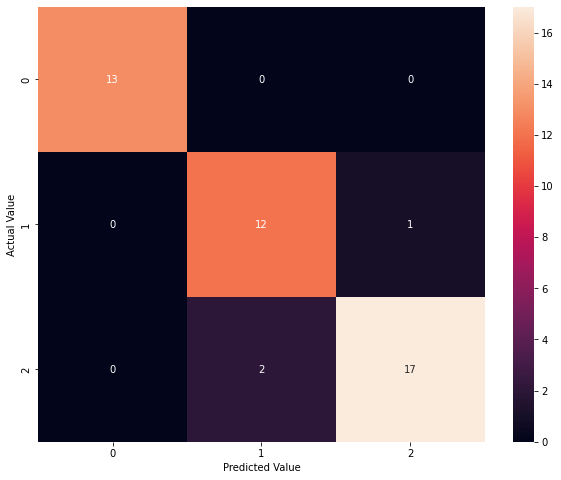

In [19]:
# visualizing the confusion matrix
plt.figure(figsize = (10,8))
sns.heatmap(con_max, annot = True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()